<a href="https://colab.research.google.com/github/prayas99/KDOM_GroupD3/blob/main/KDOMLab5_GroupD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and getting Videos

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
from math import sqrt,pi
import math

def distance_cal(x1,x2,y1,y2):
    distance = math.sqrt( ((x1-x2)**2)+((y1-y2)**2) )
    return distance

Downloading red laser video

In [ ]:
!gdown --id 1Ci4uZaDRUWkZN2kB5oxe-PGSEPMH4GXS

Downloading...
From: https://drive.google.com/uc?id=1Ci4uZaDRUWkZN2kB5oxe-PGSEPMH4GXS
To: /content/Red_laser.avi
100% 1.79M/1.79M [00:00<00:00, 119MB/s]


Downloading our four bar mechanism video

In [ ]:
!gdown --id 1E5RLepHPxYgFlYjmuJTSoSgiOcWO7nmi

Downloading...
From: https://drive.google.com/uc?id=1E5RLepHPxYgFlYjmuJTSoSgiOcWO7nmi
To: /content/our_video.mp4
5.42MB [00:00, 85.6MB/s]


# Laser

Average pixel radius of laser:  3.5941928944330073


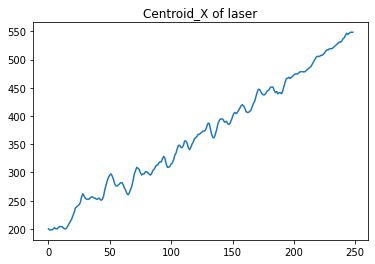

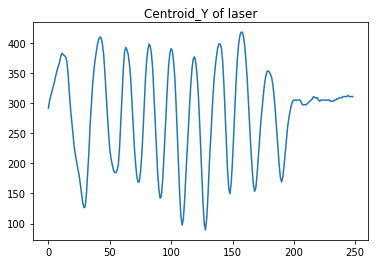

In [ ]:
# Defining boundaries to crop video
top = 0
bottom = 300
left = 250
right = 600

# Radius of lasers acccumulator
radius_acc = 0
rad_count = 0
centroid_x = []
centroid_y = []

# Input video
input_video = cv2.VideoCapture('/content/Red_laser.avi')

# Output Video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('Detected_Laser_Pointer.avi', fourcc, 30, (350, 300))

while True:
    ret, frame = input_video.read()

    if not ret:
        break

    # Cropping frames
    frame = frame[top:bottom, left:right, :]

    # Creating blank frame
    frame_final = np.zeros(frame.shape, np.uint8)

    #Grayscale conversion
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #Converting the grayscale image to binary image
    ret,thresh = cv2.threshold(gray_image,127,255,0)

    # find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
      # calculate moments for each contour
      M = cv2.moments(c)
      # calculate x,y coordinate of center
      if (M["m00"])!=0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        area = cv2.contourArea(c)
        radius = sqrt(area/pi)
        radius_acc += radius
        rad_count+=1

        #Marking sign for center
        cv2.line(frame_final,(cX-5, cY),(cX+5, cY),(255,0,0),2)
        cv2.line(frame_final,(cX, cY-5),(cX, cY+5),(255,0,0),2)

        # Scale decided according to calculated average radius after first run
        scale = 7/3.6
        centroid_x.append(cX*scale)
        centroid_y.append(cY*scale)

    output_movie.write(frame_final)
avg_rad = radius_acc/rad_count
print("Average pixel radius of laser: ", avg_rad)
# Stopping output
output_movie.release()

plt.plot(centroid_x)
plt.title("Centroid_X of laser")
plt.show()

plt.plot(centroid_y)
plt.title("Centroid_Y of laser")
plt.show()

# 4Bar Mechanism

Pixel length of Link3:  397.0201506221063
After scaling length of Link3:  112.9919348670515
Scale:  0.2846203141652531
X1,Y1 of Joint 1 by avg X1,Y1 of joint 2:  93.34375 64.84760416666683


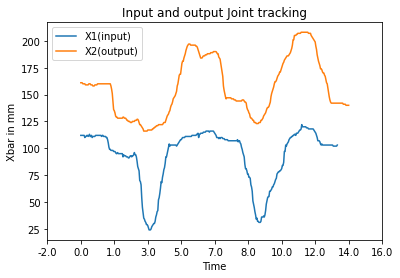

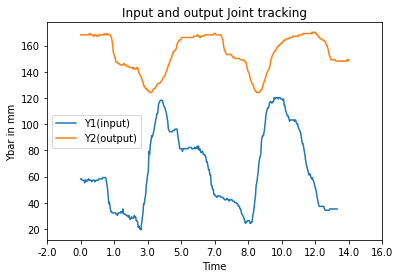

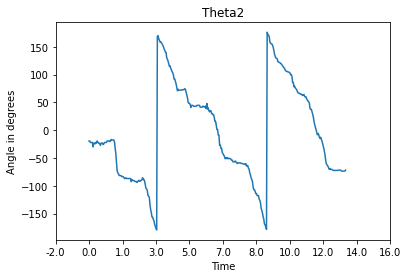

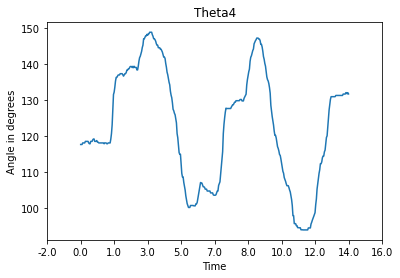

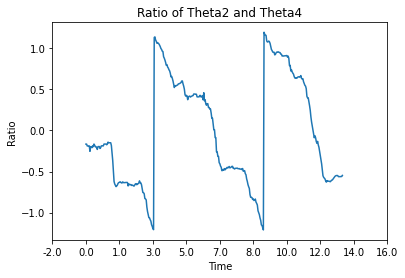

In [ ]:
top = 50
bottom = 800
left = 0
right = 700

timer_now = []
centroid_x1 = []
centroid_y1 = []
centroid_x2 = []
centroid_y2 = []
theta2 = []
theta4 = []
ratio_thetas = []

input_video = cv2.VideoCapture('/content/our_video.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('Detected_Joints.avi', fourcc, 30, ( bottom-top,right-left))

while True:
    ret, frame = input_video.read()

    if not ret:
        break
    frame = frame[top:bottom, left:right, :]
    frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)

    #Creating while frame 
    frame_final = np.zeros(frame.shape, np.uint8)+255
     # color space 
    imageFrame = frame.copy()
    hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 
  
    # Set range for red color and  
    # define mask (red pin)
    red_lower = np.array([155,25,0])
    red_upper = np.array([179,255,255])

    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 
  
  
    # Set range for blue color and 
    # define mask (blue pin)
    blue_lower = np.array([94, 80, 2], np.uint8) 
    blue_upper = np.array([120, 255, 255], np.uint8) 
    blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper) 

    kernal = np.ones((5, 5), "uint8") 
      
    # For red color 
    red_mask = cv2.dilate(red_mask, kernal) 
    res_red = cv2.bitwise_and(imageFrame, imageFrame,  
                              mask = red_mask) 
      
      
    # For blue color 
    blue_mask = cv2.dilate(blue_mask, kernal) 
    res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
                               mask = blue_mask) 
   
    # Creating contour to track red color 
    contours, hierarchy = cv2.findContours(red_mask, 
                                           cv2.RETR_TREE, 
                                           cv2.CHAIN_APPROX_SIMPLE) 
      
    for pic, contour in enumerate(contours): 
        area = cv2.contourArea(contour) 
        M = cv2.moments(contour)

      # calculate x,y coordinate of center
        if (M["m00"])!=0:
          cX = int(M["m10"] / M["m00"])
          cY = int(M["m01"] / M["m00"])
          x1,y1 = cX,cY

          # 0.2846 is the scale discovered after first run
          cX=int(cX*0.2846)
          cY=int(cY*0.2846)

          # Threshold of radius of contours as 300
          if(area > 300): 
              
              cv2.line(frame_final,(x1-5, y1),(x1+5, y1),(0, 0, 255),2)
              cv2.line(frame_final,(x1, y1-5),(x1, y1+5),(0, 0, 255),2)

              centroid_x1.append(cX)
              centroid_y1.append(700*0.2846-cY)    
              targetX,targetY = cX,700*0.2846-cY
              origX,origY = 93.34375, 64.8476
              myradians = math.atan2(targetY-origY, targetX-origX)

              mydegrees = math.degrees(myradians)
              theta2.append(mydegrees)

              x, y, w, h = cv2.boundingRect(contour)   
              cv2.putText(frame_final, "Joint 1", (x, y), 
                          cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
                          (0, 0, 255),lineType=2)     
  
  
    # Creating contour to track blue color 
    contours, hierarchy = cv2.findContours(blue_mask, 
                                           cv2.RETR_TREE, 
                                           cv2.CHAIN_APPROX_SIMPLE) 
    for pic, contour in enumerate(contours): 
        area = cv2.contourArea(contour) 
        M = cv2.moments(contour)

      # calculate x,y coordinate of center
        if (M["m00"])!=0:
          cX = int(M["m10"] / M["m00"])
          cY = int(M["m01"] / M["m00"])
          x2,y2 = cX,cY
          cX=int(cX*0.2846)
          cY=int(cY*0.2846)

          if(area > 300):               
              cv2.line(frame_final,(x2-5, y2),(x2+5, y2),(255, 0, 0),2)
              cv2.line(frame_final,(x2, y2-5),(x2, y2+5),(255, 0, 0),2)           

              centroid_x2.append(cX)
              centroid_y2.append(700*0.2846-cY)   
              targetX,targetY = cX,700*0.2846-cY
              origX,origY = 93.34375+122, 64.8476   
              myradians = math.atan2(targetY-origY, targetX-origX)

              mydegrees = math.degrees(myradians)
              theta4.append(mydegrees)                                
              x, y, w, h = cv2.boundingRect(contour) 

              # Getting original time of video
              timer_now.append(input_video.get(cv2.CAP_PROP_POS_MSEC)//1000)

              cv2.putText(frame_final, "Joint 2", (x, y), 
                          cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
                          (255, 0, 0),lineType=2)    
               
    output_movie.write(frame_final)          

output_movie.release()
timer_now = np.arange(16)

# 113 mm is the original length of Link3
scale = (113/distance_cal(x1,x2,y1,y2))
print("Pixel length of Link3: ",distance_cal(x1,x2,y1,y2))
print("After scaling, length of Link3: ",distance_cal(x1*0.2846,x2*0.2846,y1*0.2846,y2*0.2846))
print("Scale: ",scale)

avg_x1 = sum(centroid_x1)/len(centroid_x1)
avg_y1 = sum(centroid_y1)/len(centroid_y1)
print("X1,Y1 of Joint 1 by avg X1,Y1 of joint 2: ",avg_x1,avg_y1)

plt.figure()
plt.plot(centroid_x1, label="X1(input)")
plt.plot(centroid_x2, label="X2(output)")
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*16)//1)
plt.legend()
plt.title("Input and output Joint tracking")
plt.xlabel("Time")
plt.ylabel("Xbar in mm")
plt.savefig("fig_X1_X2.jpg",dpi=600)
plt.show()


plt.figure()
plt.plot(centroid_y1, label="Y1(input)")
plt.plot(centroid_y2, label="Y2(output)")
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*16)//1)
plt.legend()
plt.title("Input and output Joint tracking")
plt.xlabel("Time")
plt.ylabel("Ybar in mm")
plt.savefig("fig_Y1_Y2.jpg",dpi=600)
plt.show()

plt.figure()
plt.plot(theta2)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*16)//1)
plt.title("Theta2")
plt.xlabel("Time")
plt.ylabel("Angle in degrees")
plt.savefig("fig_theta2.jpg",dpi=600)
plt.show()

plt.figure()
plt.plot(theta4)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*16)//1)
plt.title("Theta4")
plt.xlabel("Time")
plt.ylabel("Angle in degrees")
plt.savefig("fig_theta4.jpg",dpi=600)
plt.show()

req_ratio = [i / j for i, j in zip(theta2, theta4)]

plt.figure()
plt.plot(req_ratio)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*16)//1)
plt.title("Ratio of Theta2 and Theta4")
plt.xlabel("Time")
plt.ylabel("Ratio")
plt.savefig("fig_ratio.jpg",dpi=600)
plt.show()
#plt.show()